# CTD study

import cnv files

In [24]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from seabird.cnv import fCNV
from tqdm import tqdm
from datetime import datetime

In [25]:
ctddir       = '../BATHYSONDE/DATA/TRAIT/CNV/'


list_of_ctd_files = sorted(filter(os.path.isfile,\
                           glob.glob(ctddir + '*.cnv')))

print('Found ' + str(len(list_of_ctd_files)) + ' CTD files in the directory: ' + ctddir)

# keys: ['scan', 'timeJ', 'timeQ', 'LATITUDE', 'LONGITUDE', 'PRES', 'TEMP', 'CNDC', 'descentrate', 'flECO-AFL', 'v1', 'wetCDOM', 'v0', 'turbWETntu0', 'v5', 'CStarTr0', 'CStarAt0', 'oxygen_ml_L', 'oxsolML/L', 'v2', 'flag', 'timeS']
LAT = []
LON = []
PRES = []
TEMP = []
COND = []
TURB = []
OXY = []
FLUO = []
CDOM = []
DATETIME = []

for ctd_dat_name in tqdm(list_of_ctd_files[0:]):
    ctd_files = ctd_dat_name
    cnv = fCNV(ctd_files)
    LAT.append(cnv['LATITUDE'])
    LON.append(cnv['LONGITUDE'])
    PRES.append(cnv['PRES'])
    TEMP.append(cnv['TEMP'])
    COND.append(cnv['CNDC'])
    TURB.append(cnv['turbWETntu0'])
    OXY.append(cnv['oxygen_ml_L'])
    FLUO.append(cnv['flECO-AFL'])
    CDOM.append(cnv['wetCDOM'])

    with open(ctd_dat_name, 'r') as f:
        header_lines = []
        for _ in range(10): 
            header_lines.append(f.readline().strip())

    line = header_lines[9]
    date_str = line.split('=')[1].strip()
    dt = datetime.strptime(date_str, "%b %d %Y %H:%M:%S")
    DATETIME.append(dt)







Found 4 CTD files in the directory: ../BATHYSONDE/DATA/TRAIT/CNV/


 25%|██▌       | 1/4 [00:11<00:33, 11.29s/it]

2025-08-09 08:27:35


It was supposed to has 21 variables.
 50%|█████     | 2/4 [00:24<00:25, 12.63s/it]

2025-08-10 22:40:15


It was supposed to has 21 variables.
 75%|███████▌  | 3/4 [00:37<00:12, 12.51s/it]

2025-08-11 02:04:24


It was supposed to has 21 variables.
100%|██████████| 4/4 [00:49<00:00, 12.46s/it]

2025-08-11 05:49:06


Text(0, 0.5, 'Pressure (dbar)')

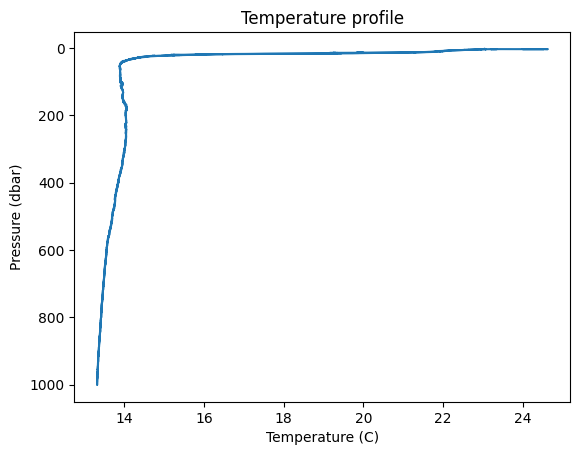

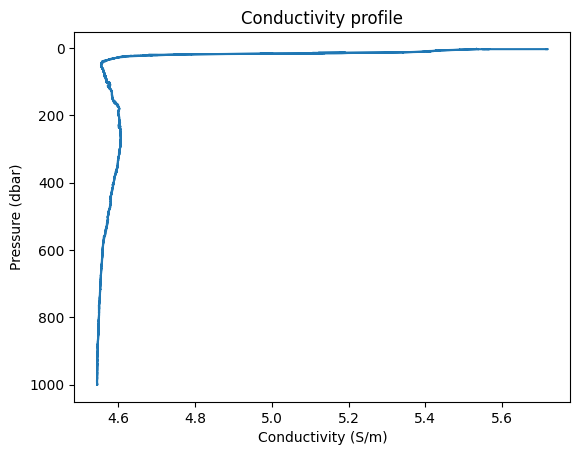

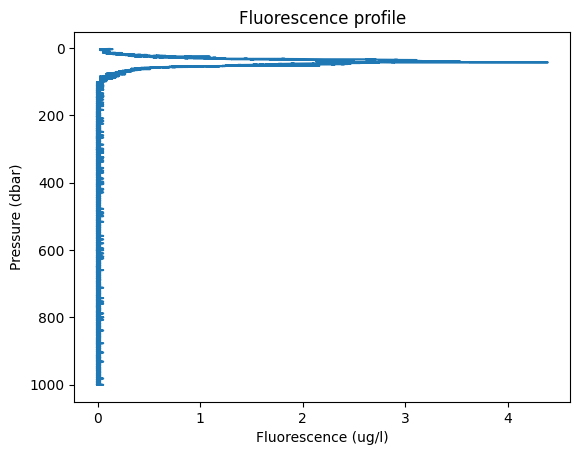

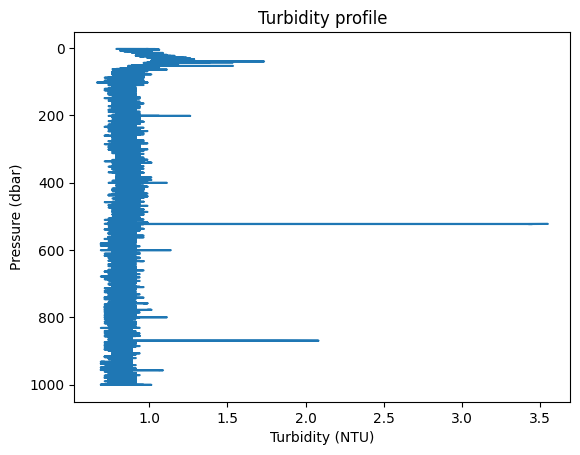

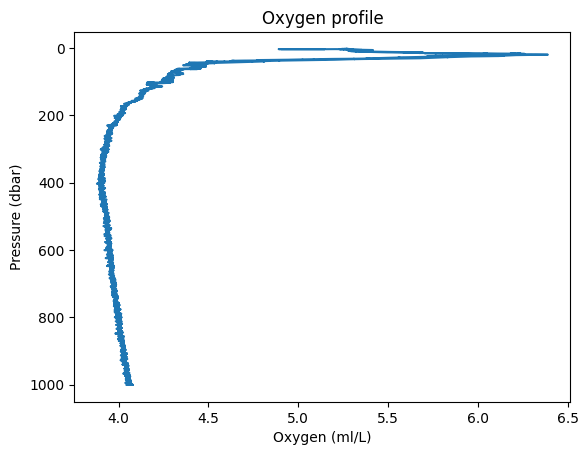

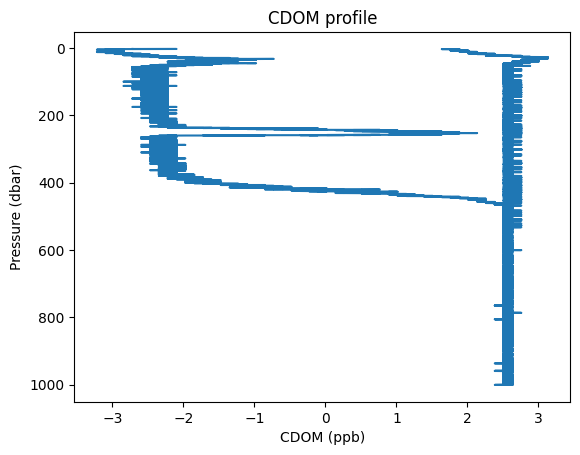

In [21]:
i = 2

plt.figure(1)
plt.plot(TEMP[i],PRES[i])
plt.gca().invert_yaxis()
plt.title('Temperature profile') 
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)')
plt.ylabel('Pressure (dbar)')


plt.figure(2)
plt.plot(COND[i],PRES[i]) 
plt.gca().invert_yaxis()
plt.title('Conductivity profile')
plt.xlabel('Conductivity (S/m)')
plt.ylabel('Pressure (dbar)')


plt.figure(3)
plt.plot(FLUO[i],PRES[i])
plt.gca().invert_yaxis()
plt.title('Fluorescence profile')
plt.xlabel('Fluorescence (ug/l)')
plt.ylabel('Pressure (dbar)')


plt.figure(4)
plt.plot(TURB[i],PRES[i])
plt.gca().invert_yaxis()
plt.title('Turbidity profile')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Pressure (dbar)')

plt.figure(5)
plt.plot(OXY[i],PRES[i])
plt.gca().invert_yaxis()
plt.title('Oxygen profile')
plt.xlabel('Oxygen (ml/L)')
plt.ylabel('Pressure (dbar)')

plt.figure(6)
plt.plot(CDOM[i],PRES[i])
plt.gca().invert_yaxis()    
plt.title('CDOM profile')
plt.xlabel('CDOM (ppb)')
plt.ylabel('Pressure (dbar)')


